Usando el archivo `datos.csv` resuelva las siguientes preguntas. Para los cálculos use el lenguage Python. El archivo contiene 10 variables independientes y una variable de salida. No todas las variables independientes son relevantes. La variable de salida indica la clase a la que pertenece cada uno de los ejemplos.

# Pregunta 1

Si se usa un algoritmo de detección de grupos (como k-means), el algoritmo es capaz de detectar los grupos existentes y asignar correctamente los registros a cada grupo? Podría escogerse un subconjunto de variables independientes para mejorar la detección de grupos? argumente.

In [19]:
import pandas as pd

## Lee el archivo
data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números

data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,class
0,0.217051,2.301448,2.063373,-2.877469,-0.280745,3.037343,1.523219,10.096846,1.375297,4.496868,1
1,0.245344,1.873901,2.177668,-2.907616,0.539491,3.113836,1.327698,10.024680,1.394138,5.226368,1
2,0.515188,2.052923,2.021482,-2.868717,-0.211045,3.082855,1.517711,10.090917,1.316772,4.904708,1
3,0.529766,1.793446,2.211673,-2.912831,0.281599,3.107664,1.510040,10.024062,1.379927,5.429069,1
4,0.821210,1.472261,2.057228,-2.733129,-0.566706,3.071136,1.462961,10.080511,1.363613,4.788601,1


For n_clusters = 2 The average silhouette_score is : 0.506981764453


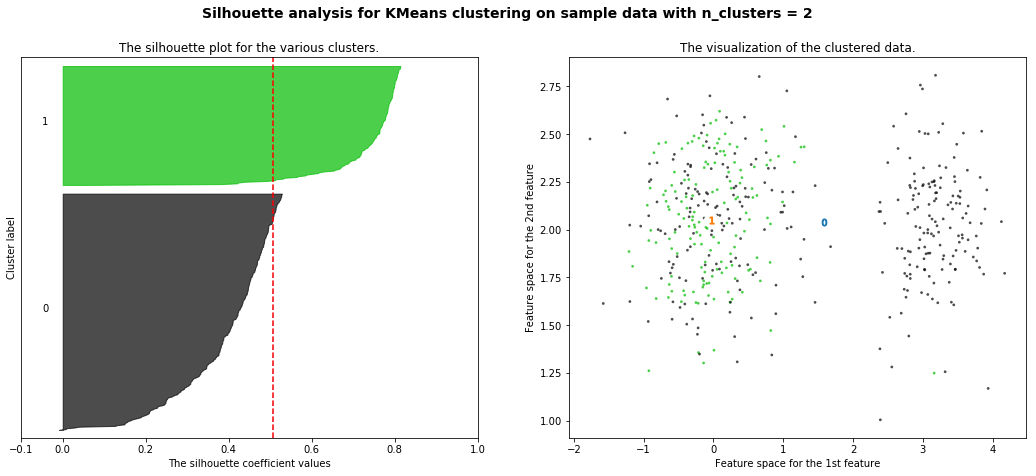

For n_clusters = 3 The average silhouette_score is : 0.715264903804


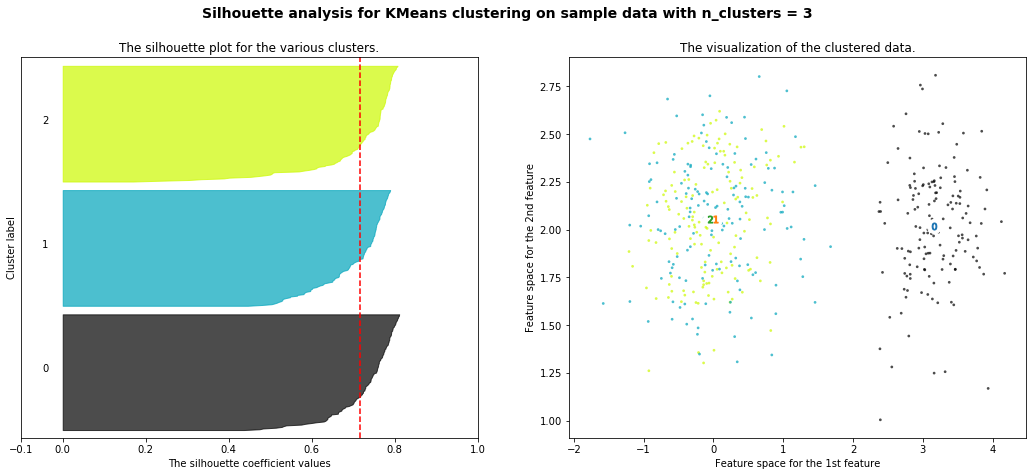

For n_clusters = 4 The average silhouette_score is : 0.613287345041


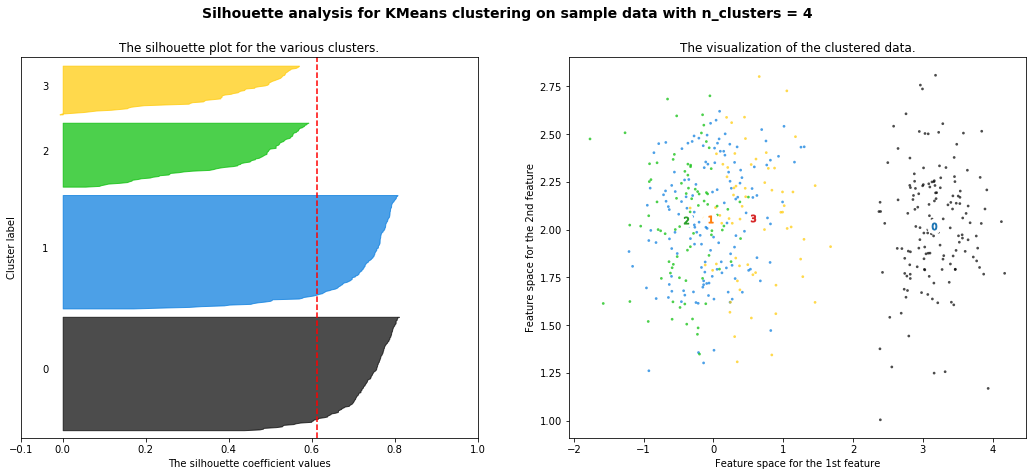

For n_clusters = 5 The average silhouette_score is : 0.487031594407


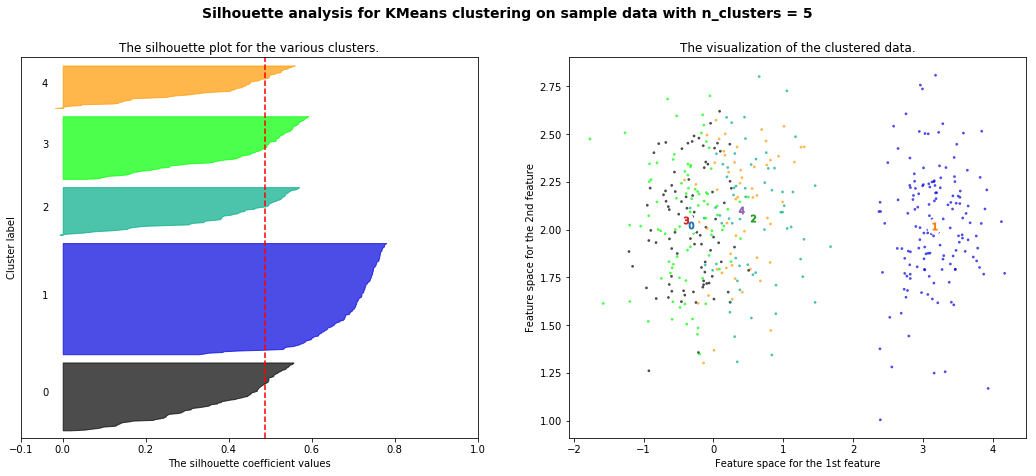

For n_clusters = 6 The average silhouette_score is : 0.391760013296


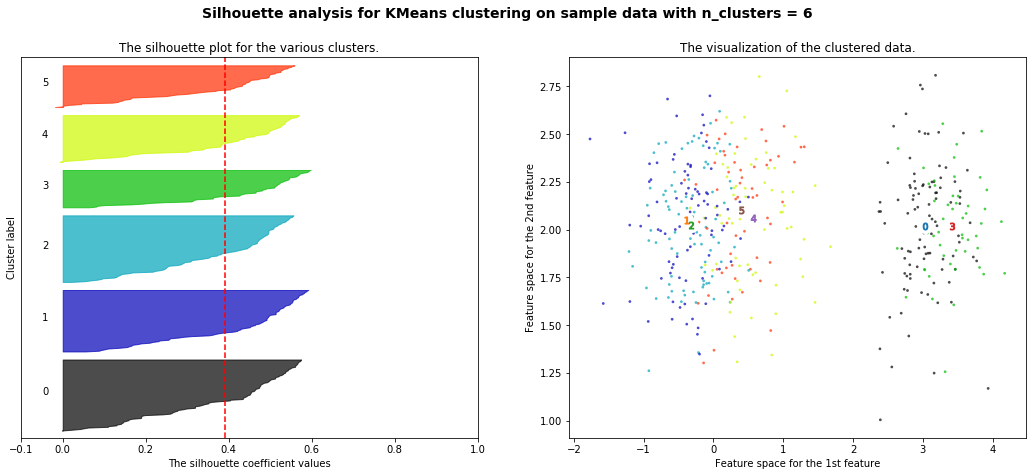

In [41]:
## Codigo obtenido de la URL: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

## Lee el archivo
data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números

X=data.as_matrix()
X=X[:,:-1]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**¿el algoritmo es capaz de detectar los grupos existentes y asignar correctamente los registros a cada grupo?**

El ***analisis de la silueta (Silhouette Analysis)*** se usa para estudiar la distancia de separación entre los clusters resultantes. Las graficas de este analisis muestra una medida de cuan cerca cada punto en un cluster esta a los puntos en los clusters vecinos. La medida tiene un rango de -1 a 1.

Si el score esta cerca de 1, indica que los puntos dados estan lejos de los clusters vecinos. Un valor de 0 indica que la muestra de puntos esta muy cerca de una frontera de decision entre dos clusters vecinos y valores negativos (\<0) indican que esos puntos pudieron haber sido asignados al cluster incorrecto.

Por otro lado el grosor de los clusters en el grafico muestra el tamaño del cluser (cuantos puntos tiene). Si hay un cluster considerablemente mas grande que los demas, puede ser que tal cluster esta agrupando otros subclusters. 

La grafica del analisis SILHOUETTE muestra que los valores de clusters 2, 4 y 5 son malas opciones debido a la presencia de clusters con bajo promedio de scores y ademas debido a considerables flucturaciones en el tamaño de las graficas.

En el caso del grafico de 6 clusters, se observa que tienen un tamaño homogeneo, sin embargo se descarta porque tiene un score bajo (lo cual denota cercania de los puntos a los otros clusters) y además porque 6 clusters presentan una mayor complejidad de interpretación.

***R//. Por lo tanto, la cantidad optima de cluster es 3 porque presentan un score mas cercano a 1 y además, el tamaño de clusters es similar.***

Bibligrafia  
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html  

**¿Podría escogerse un subconjunto de variables independientes para mejorar la detección de grupos?**

Para clustering las personas definen variables que son potencialmente utiles. Sin embargo, no todas ellas son necesariamente relevantes y en tal caso escoger un subconjunto de las variables originales planteadas produce generalmente un mejor desempeño.

El problema de dejar todas las variables es que no todas son importantes. algunas de ellas pueden ser redundantes, algunas irrelevantes y algunas incluso pueden afectar negativamente los resultados del clustering. Además, reduciendo el numero de variables se incrementa la entendibilidad del modelo y mejora el problema de que algunos algoritmos de aprendizaje no supervisado se dañan con alta dimensionalidad de datos (muchas variables).

El objetivo de la selección de variables para el aprendizaje sin supervisión es encontrar el subconjunto de características (variables) más pequeño que mejor obtiene "interesantes y naturales" agrupaciones (clusters) de datos de acuerdo con el criterio elegido

La gente que usa k-means aborda este problema de seleccion de variables introduciendo técnicas de ***selección de variables*** y ***extracción de variables***. Vale la pena señalar que en la selección de variables se selecciona un pequeño subconjunto de variables reales de los datos y luego se ejecuta el algoritmo de agrupación sólo con las características seleccionadas, mientras que en la extracción de variables se construye un pequeño conjunto de variables artificiales y se ejecuta el algoritmo de agrupación con las características construidas

Algunos de los metodos para llevar a cabo la seleccion de variables es el wrapper framework, analisis de componentes principales, etc.

***R//. Si, según lo explicado en esta celda, si es posible escoger un subconjunto de variables independientes para la detención de grupos.***  

Bibliografia  
http://www.jmlr.org/papers/volume5/dy04a/dy04a.pdf  
http://www.stat.berkeley.edu/~mmahoney/pubs/NIPS09.pdf

# Pregunta 2

Constuya un sistema clasificador que permita asignar un nuevo punto a una de las tres clases. El clasificador debe usar internamente la regresión logística. Es posible detectar las variables relevantes independientes usando regresión  logística? 

In [11]:
import pandas as pd

## Lee el archivo
data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números
data.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,class
0,0.217051,2.301448,2.063373,-2.877469,-0.280745,3.037343,1.523219,10.096846,1.375297,4.496868,1
1,0.245344,1.873901,2.177668,-2.907616,0.539491,3.113836,1.327698,10.024680,1.394138,5.226368,1
2,0.515188,2.052923,2.021482,-2.868717,-0.211045,3.082855,1.517711,10.090917,1.316772,4.904708,1
3,0.529766,1.793446,2.211673,-2.912831,0.281599,3.107664,1.510040,10.024062,1.379927,5.429069,1
4,0.821210,1.472261,2.057228,-2.733129,-0.566706,3.071136,1.462961,10.080511,1.363613,4.788601,1


In [30]:
#http://scikit-learn.org/stable/modules/feature_selection.html
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números
features = list(data.columns[:10])
data = data.as_matrix()
data = np.matrix(data)

X, X_test, y, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,10:11]), test_size=0.30, random_state=42)

#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
lsvc = LogisticRegression(C=1, penalty="l1", dual=False).fit(X, y)

model = SelectFromModel(lsvc, prefit=True,threshold="1.25*mean")
X_new = model.transform(X)

X_transform = X_new
n_features = X_transform.shape[1]

y_pred=lsvc.predict(X_test)
mean_squared_error(y_test, y_pred)

#http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
#http://datascience.stackexchange.com/questions/12793/sklearn-feature-selection-stopping-criterion-selectfrommodel


0.0

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números
features = np.array((data.columns[:10]))
data = data.as_matrix()
data = np.matrix(data)

X, X_test, y, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,10:11]), test_size=0.30, random_state=42)

clf = LogisticRegression()

#No se entrega el modelo ajustado
model = SelectFromModel(clf, threshold="2.01*mean")
X_transform = model.fit_transform(X, y)
#get the names of all features
#get the names of the important features using the boolean index from model 
print(model.get_support())
features[model.get_support()]

[ True False False False  True False False False False False]


array(['x1', 'x5'], dtype=object)

In [ ]:
sklearn.linear_model.LogisticRegression
Implementa una regresion logistica regularizada. se puede parametrizar la regularizacion mediante los parametros...
penalty: l1 (lasso) ó l2 (ridge)
C: valor inverso de la rigidez de la regularizacion, es decir, pequeños valores especifican una fuerte regularizacion


Si,si es posibleidentificar las variables relevantes, mediante funciones tal como SelectFromModel


In [ ]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid

N = 100
X = np.random.randn(N, 50)
y = np.random.randint(0, 2, N)



pipe = Pipeline([('fs', SelectFromModel(estimator=LogisticRegression(penalty='l1'))),
                 ('lr', LogisticRegression(penalty='l1'))])

parameters = {'fs__estimator__C': [1, 10], 'lr__C': [100]}
param_grid = ParameterGrid(parameters)

for param in param_grid:

    pipe.set_params(**param)
    d = pipe.get_params()
    print('SELECTED:')
    print('SelectFromModel - LogisticRegression: C', d['fs__estimator__C'])

    pipe.fit(X, y)
    print('ACTUAL:')
    print(pipe.named_steps['fs'].estimator_)

# Pregunta 3

Construya un sistema clasificador usando la técnica de vecinos más próximos. Cómo podría modificar el algoritmo para detectar las variables más relevantes?

In [3]:
#https://www.youtube.com/watch?v=6dbrR-WymjI


# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD

import pylab as pl
from sklearn import neighbors, datasets

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números

data = data.as_matrix()
data = np.matrix(data)

X, X_test, Y, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,10:11]), test_size=0.30, random_state=42)


# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:, :2] # we only take the first two features. 
#Y = iris.target


h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
#y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(X_test)
mean_squared_error(y_test, Z)

0.0

# Pregunta 4

Construya un sistema clasificador usando árboles de decisión. Ya que los árboles permiten detectar variables relevantes, las variables seleccionadas en este punto coinciden con las obtenidas en las preguntas anteriores?

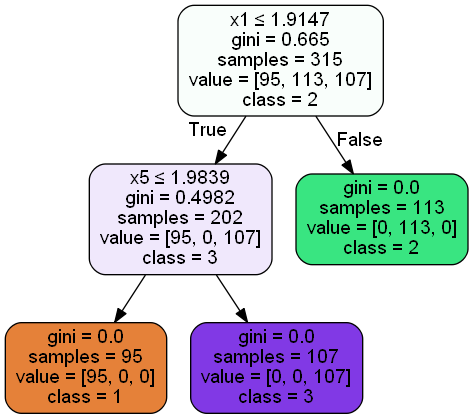

In [24]:
#http://scikit-learn.org/stable/modules/tree.html

from sklearn.datasets import load_iris  
from sklearn import tree  
import pydotplus  
from IPython.display import Image  
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números
features = list(data.columns[:10])
data = data.as_matrix()
data = np.matrix(data)

X_train, X_test, y_train, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,10:11]), test_size=0.30, random_state=42)

#Se construye el arbol
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#Se exporta el arbol al formato Graphviz 
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

#Con el comando "dot -Tpdf iris.dot -o iris.pdf" se puede crear un PDF del arbol 
#por consola, a partir del archivo iris.dot creado

#Con pydotplus se puede crear el PDF desde el libro son necesidad de hacerlo por linea de comandos
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf")  

#export_graphviz soporta otras opciones tal como colorear y la funcion Image permite renderizar la imagen en el libro de Ipython
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['1', '2', '3'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

#Poder de prediccion de la clase
#y_pred=clf.predict(X_test)
#print(y_pred)
#print(y_test)
#Probabilidad de que el registro la clase pertenezca a cada una de las hojas
#clf.predict_proba(X_test)

In [21]:
#http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import pydotplus
from IPython.display import Image


data=pd.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números

data = data.as_matrix()
data = np.matrix(data)

X_train, X_test, y_train, y_test = train_test_split(
    data[:,:-1], np.ravel(data[:,10:11]), test_size=0.30, random_state=42)

estimator = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
estimator.fit(X_train, y_train)

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %ss else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[i, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 5] <= 3.41564130783s else to node 2.
	node=1 test node: go to node 3 if X[:, 9] <= 6.38698911667s else to node 4.
	node=2 leaf node.
		node=3 leaf node.
		node=4 leaf node.

Rules used to predict sample 0: 
decision id node 4 : (X[0, -2] (= 1.12850333257) > -2.0)

The following samples [0, 1] share the node [0 1 4] in the tree
It is 60.0 % of all nodes.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:80: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
https://www.youtube.com/watch?v=nlD8A-49Fc0
https://www.youtube.com/watch?v=RhsEAyDBkTQ
https://github.com/sachinruk/ml_class/blob/master/lesson1-PenalisedRegression.ipynb